<a href="https://colab.research.google.com/github/kingajutrzenka/_ML-Bootcamp-2/blob/main/Klasteryzacja-por%C3%B3wnanie_algorytm%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasteryzacja - porównanie algorytmów**

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych i wizualizacja](#1)
3. [Porównanie algorytmów - blobs data](#2)
4. [Porównanie algorytmów - cirlce data](#3)
5. [Porównanie algorytmów - moons data](#4)
6. [Porównanie algorytmów - random data](#5)



### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

### <a name='1'></a> Wygenerowanie danych i wizualizacja

In [2]:
from sklearn.datasets import make_blobs

blobs_data = make_blobs(n_samples=1000, cluster_std=0.7, random_state=24, center_box=(-4.0, 4.0))[0]
blobs = pd.DataFrame(blobs_data, columns=['x1', 'x2'])
px.scatter(blobs, 'x1', 'x2', width=950, height=500, title='blobs data', template='plotly_dark')

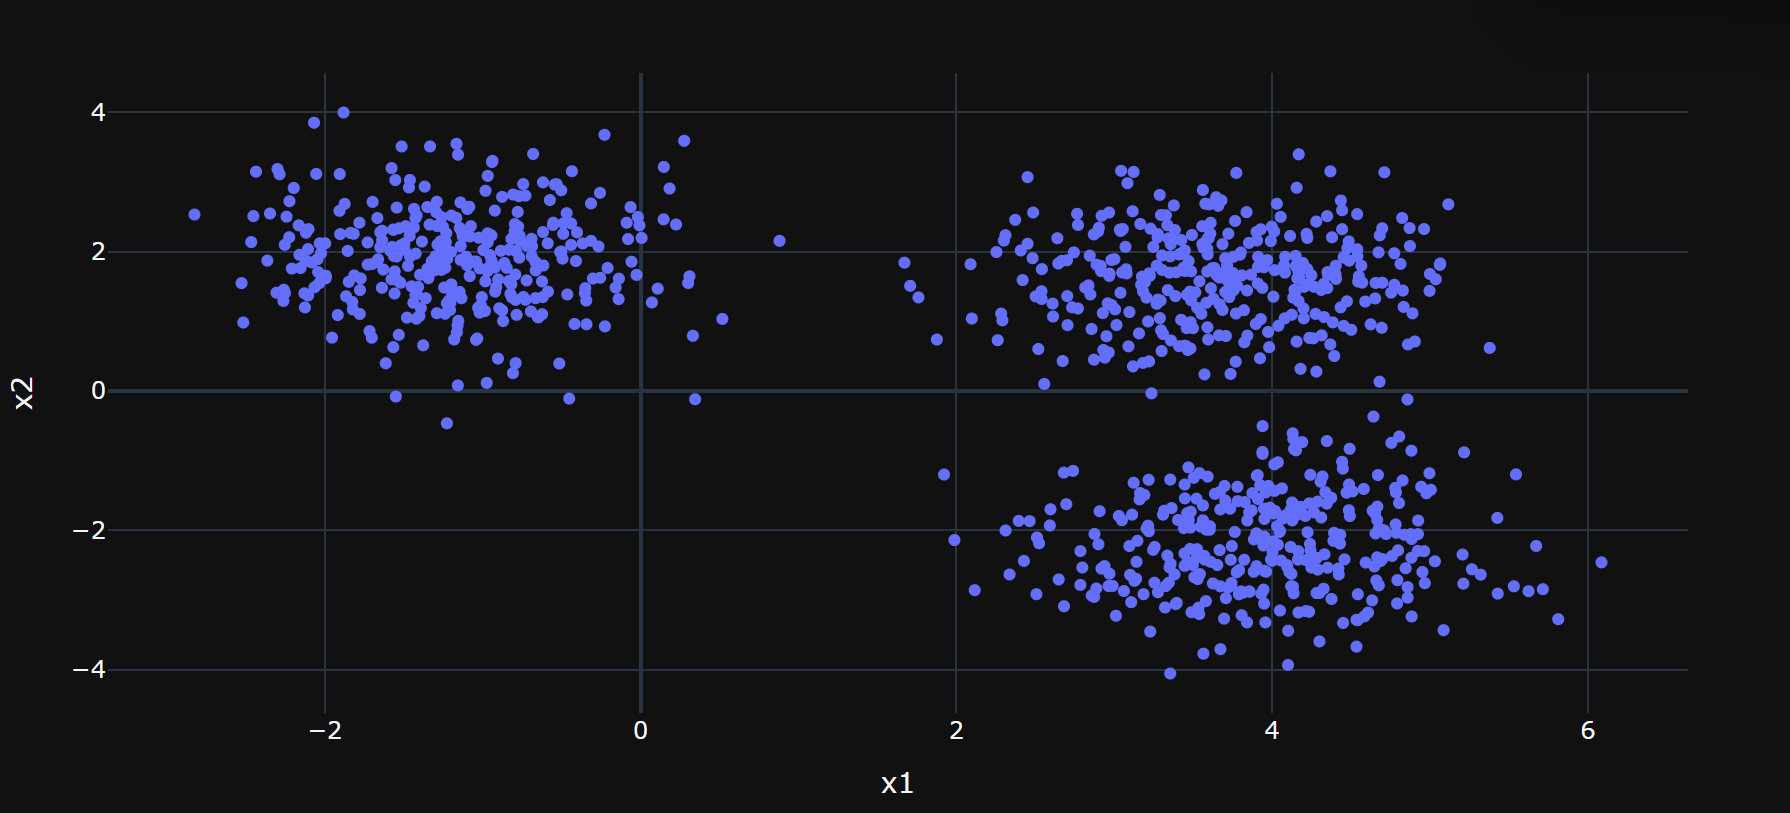

In [3]:
from sklearn.datasets import make_circles

circle_data = make_circles(n_samples=1000, factor=0.5, noise=0.05)[0]
circle = pd.DataFrame(circle_data, columns=['x1', 'x2'])
px.scatter(circle, 'x1', 'x2', width=950, height=500, title='circle data', template='plotly_dark')

In [4]:
from sklearn.datasets import make_moons

moons_data = make_moons(n_samples=1000, noise=0.05)[0]
moons = pd.DataFrame(moons_data, columns=['x1', 'x2'])
px.scatter(moons, 'x1', 'x2', width=950, height=500, title='moons data', template='plotly_dark')

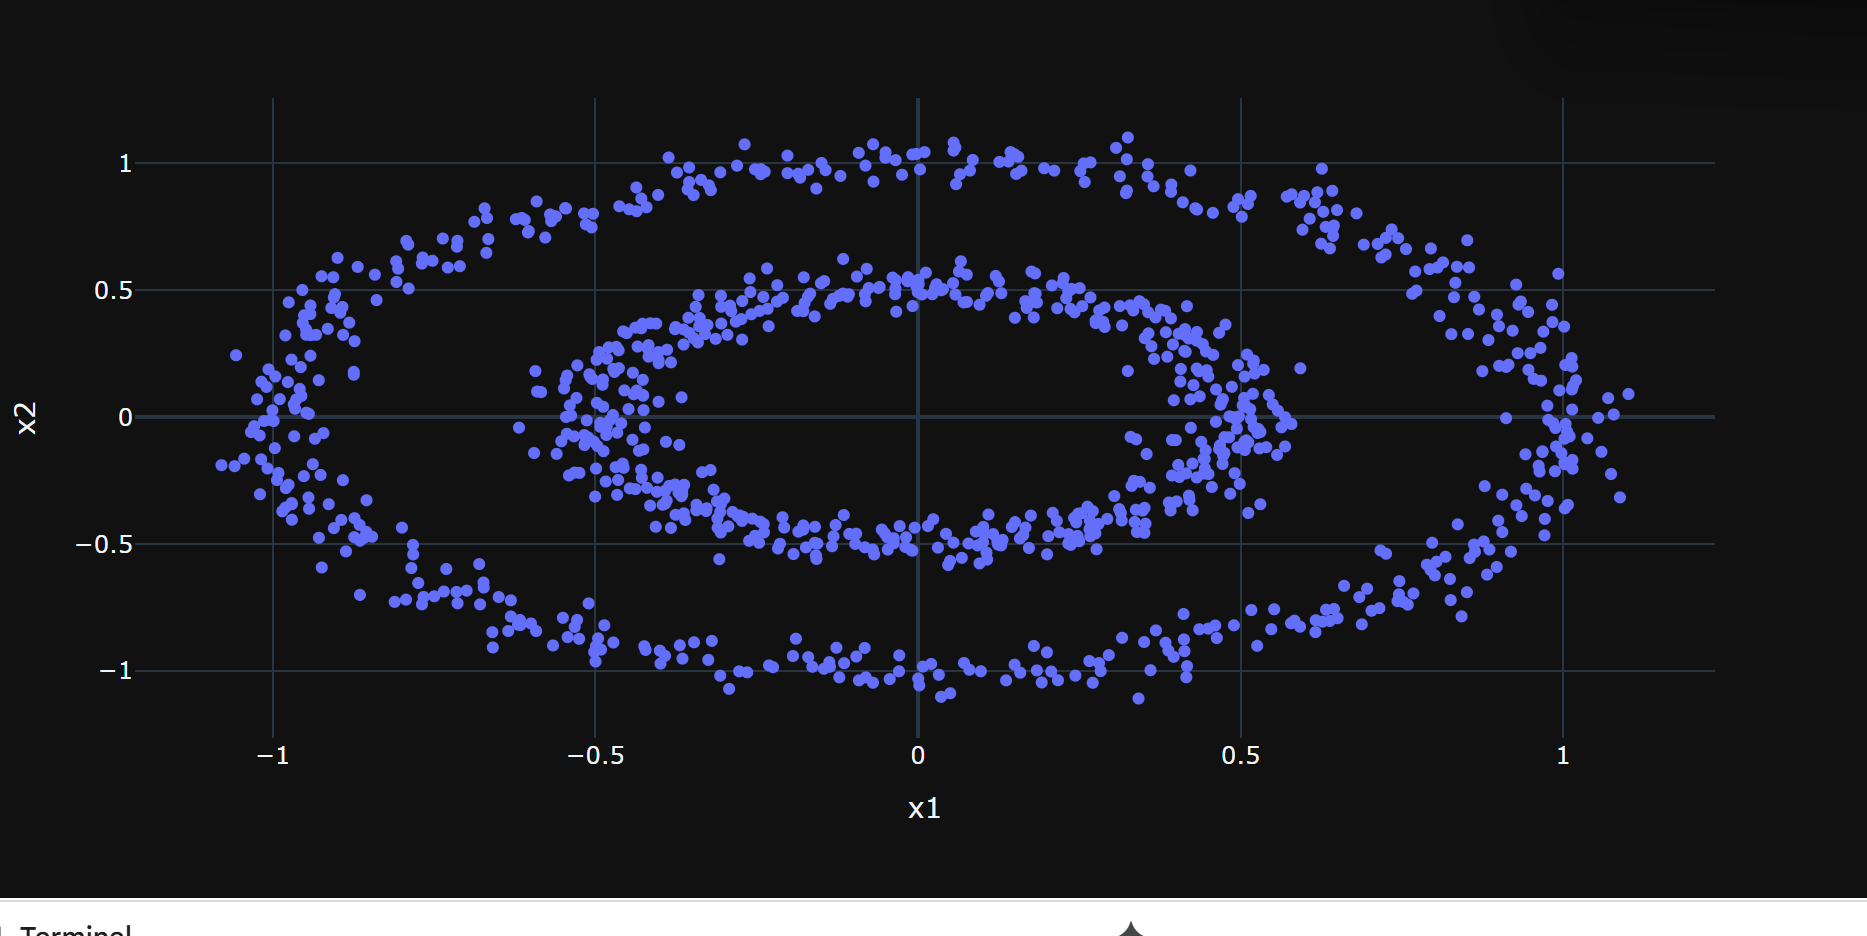

In [5]:
random_data = np.random.rand(1500, 2)
random = pd.DataFrame(random_data, columns=['x1', 'x2'])
px.scatter(random, 'x1', 'x2', width=950, height=500, title='random data', template='plotly_dark')

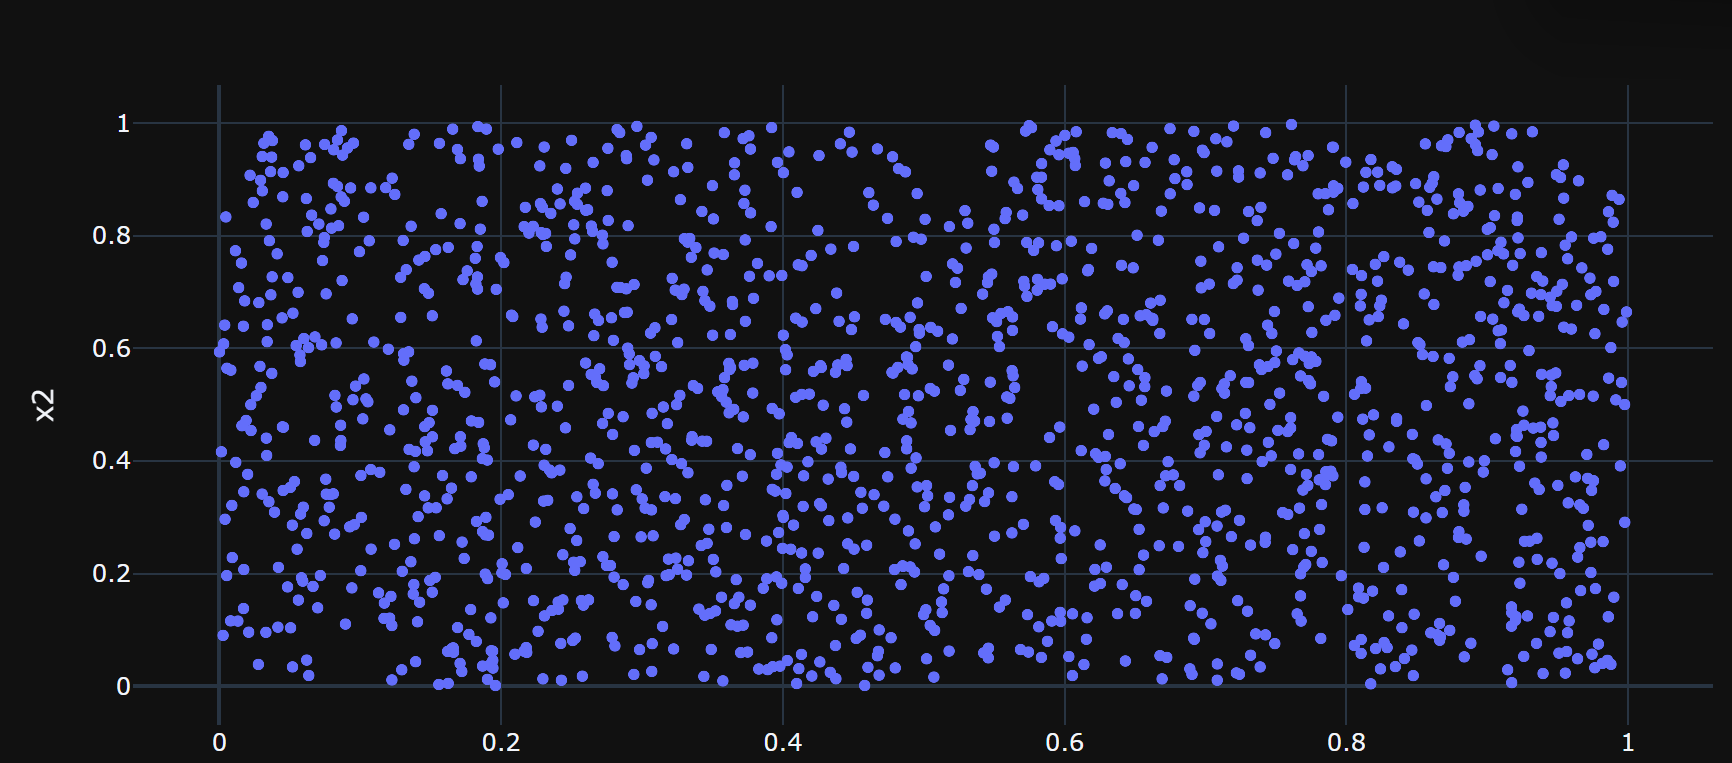

### <a name='2'></a> Porównanie algorytmów - blobs data - 3 klastry

In [7]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(blobs_data)
clusters = kmeans.predict(blobs_data)
blobs['cluster'] = clusters
trace1 = px.scatter(blobs, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(blobs_data)
blobs['cluster'] = clusters
trace2 = px.scatter(blobs, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(blobs_data)
clusters = dbscan.labels_
blobs['cluster'] = clusters
trace3 = px.scatter(blobs, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs. DBSCAN - blobs data',
                  template='plotly_dark', coloraxis = {'colorscale':'viridis'})
fig.show()

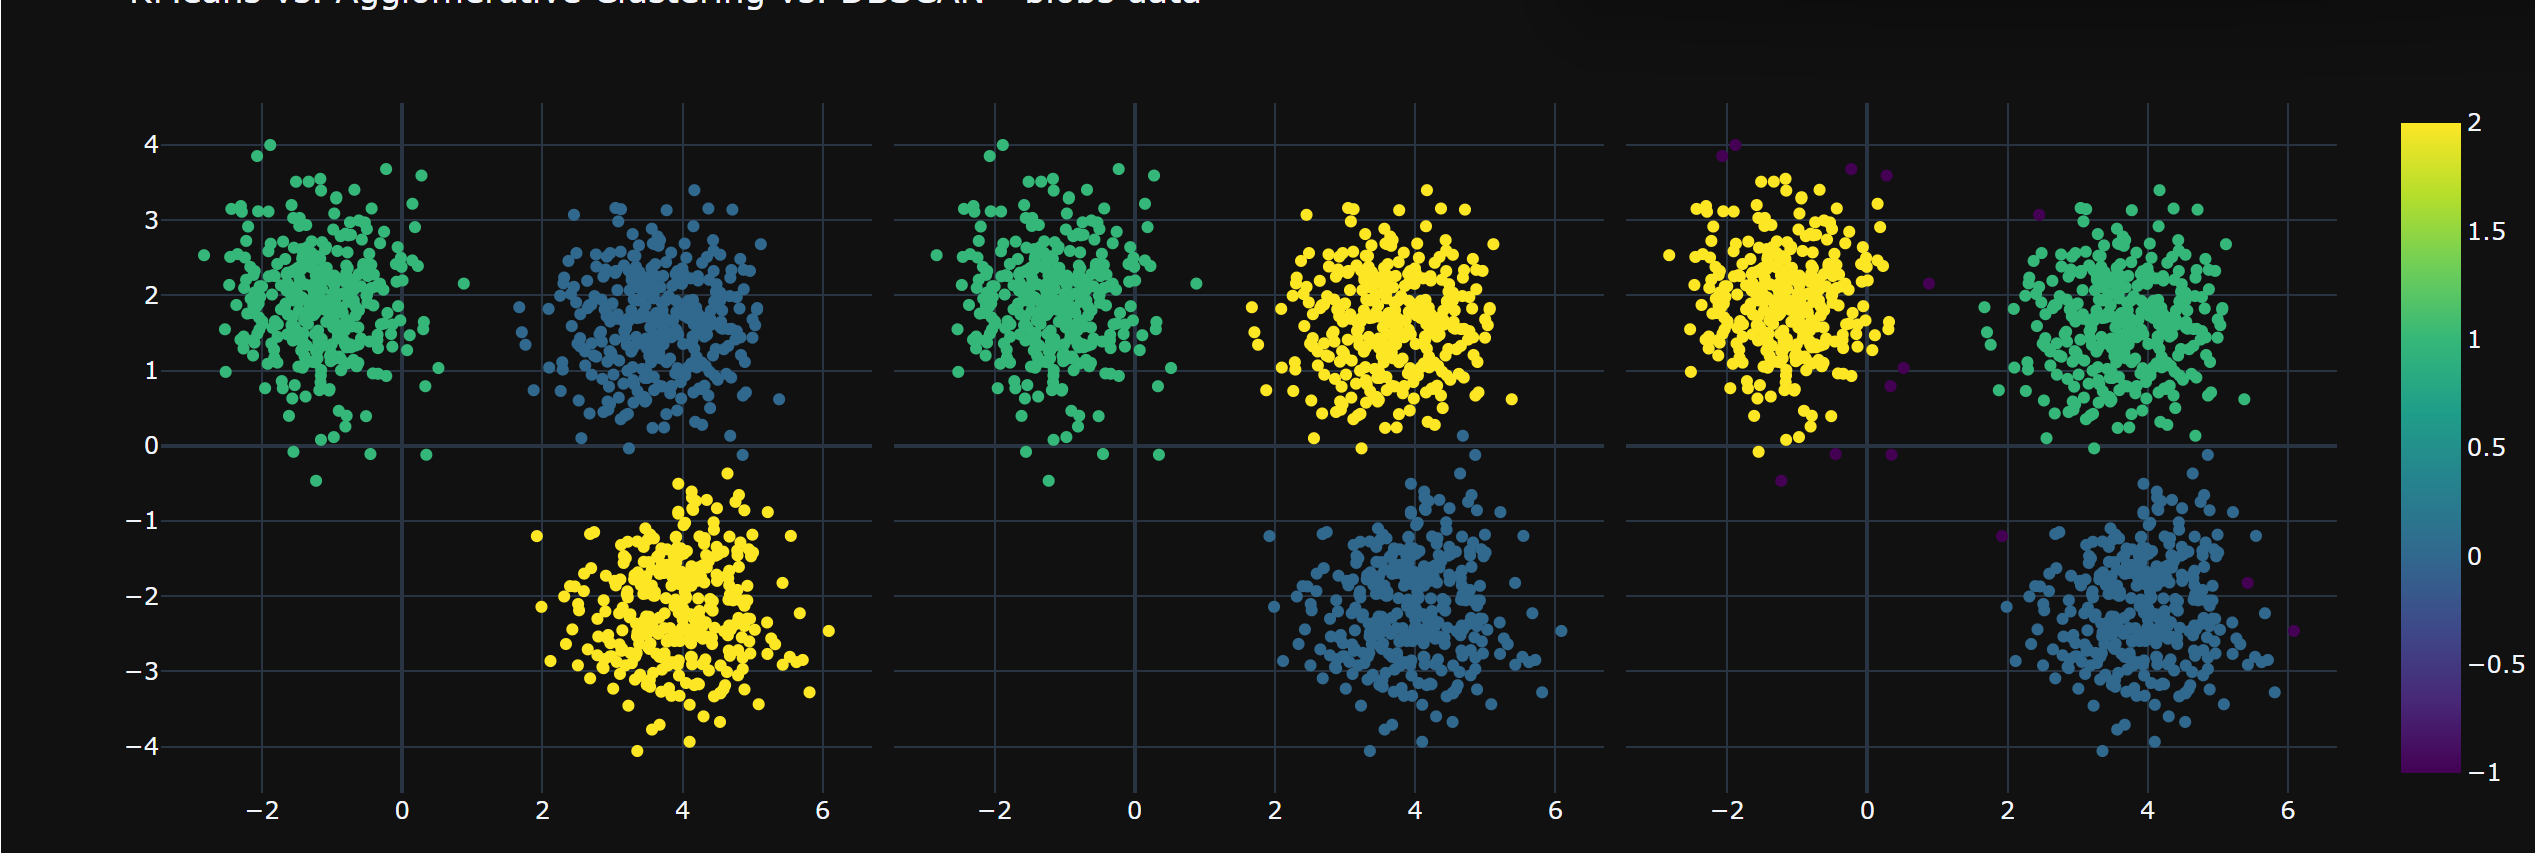

### <a name='3'></a> Porównanie algorytmów - cirlce data - 2 klastry

In [8]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(circle_data)
clusters = kmeans.predict(circle_data)
circle['cluster'] = clusters
trace1 = px.scatter(circle, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(circle_data)
circle['cluster'] = clusters
trace2 = px.scatter(circle, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

# DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(circle_data)
clusters = dbscan.labels_
circle['cluster'] = clusters
trace3 = px.scatter(circle, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs. DBSCAN - circle data', template='plotly_dark',
                  coloraxis = {'colorscale':'viridis'})

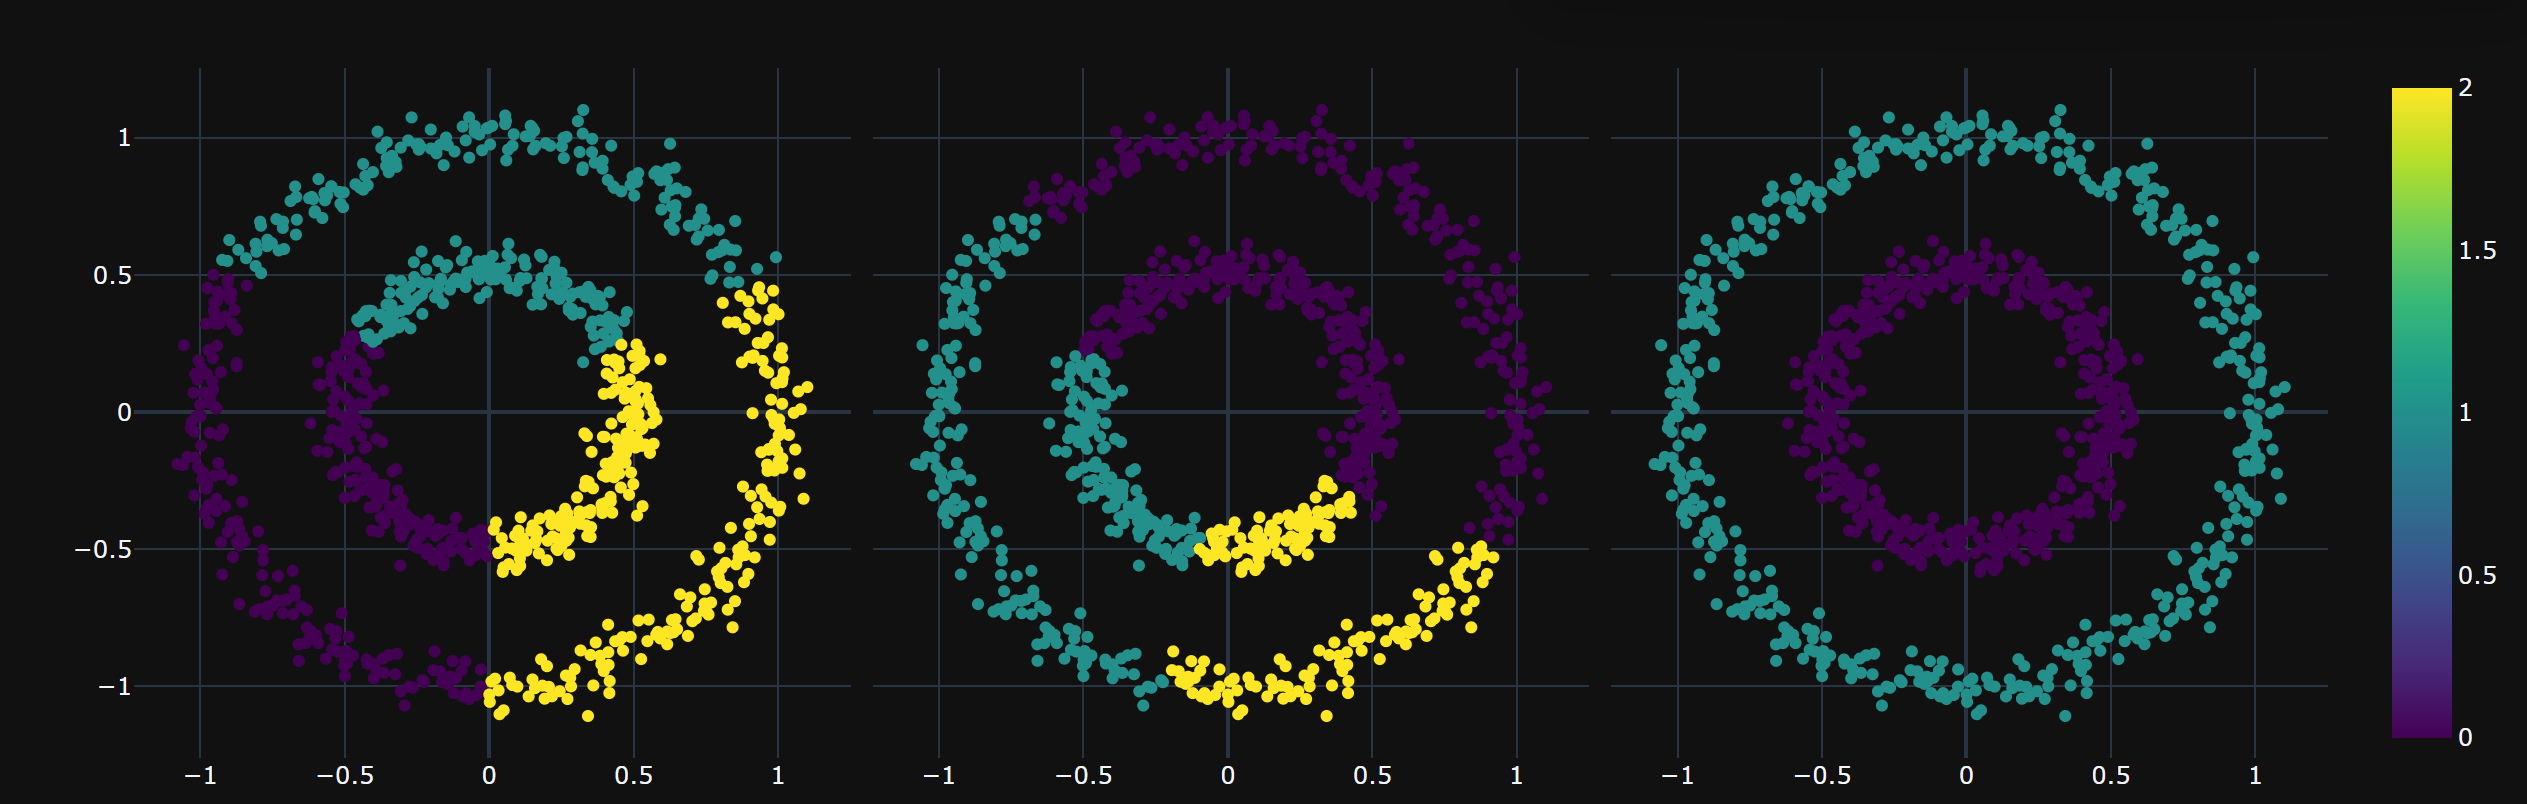

### <a name='4'></a> Porównanie algorytmów - moons data - 2 klastry

In [9]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

# KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(moons_data)
clusters = kmeans.predict(moons_data)
moons['cluster'] = clusters
trace1 = px.scatter(moons, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2)
clusters = agglo.fit_predict(moons_data)
moons['cluster'] = clusters
trace2 = px.scatter(moons, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

# DBSCAN
dbscan = DBSCAN(eps=0.07, min_samples=5)
dbscan.fit(moons_data)
clusters = dbscan.labels_
moons['cluster'] = clusters
trace3 = px.scatter(moons, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs. DBSCAN - moons data', template='plotly_dark',
                  coloraxis = {'colorscale':'viridis'})

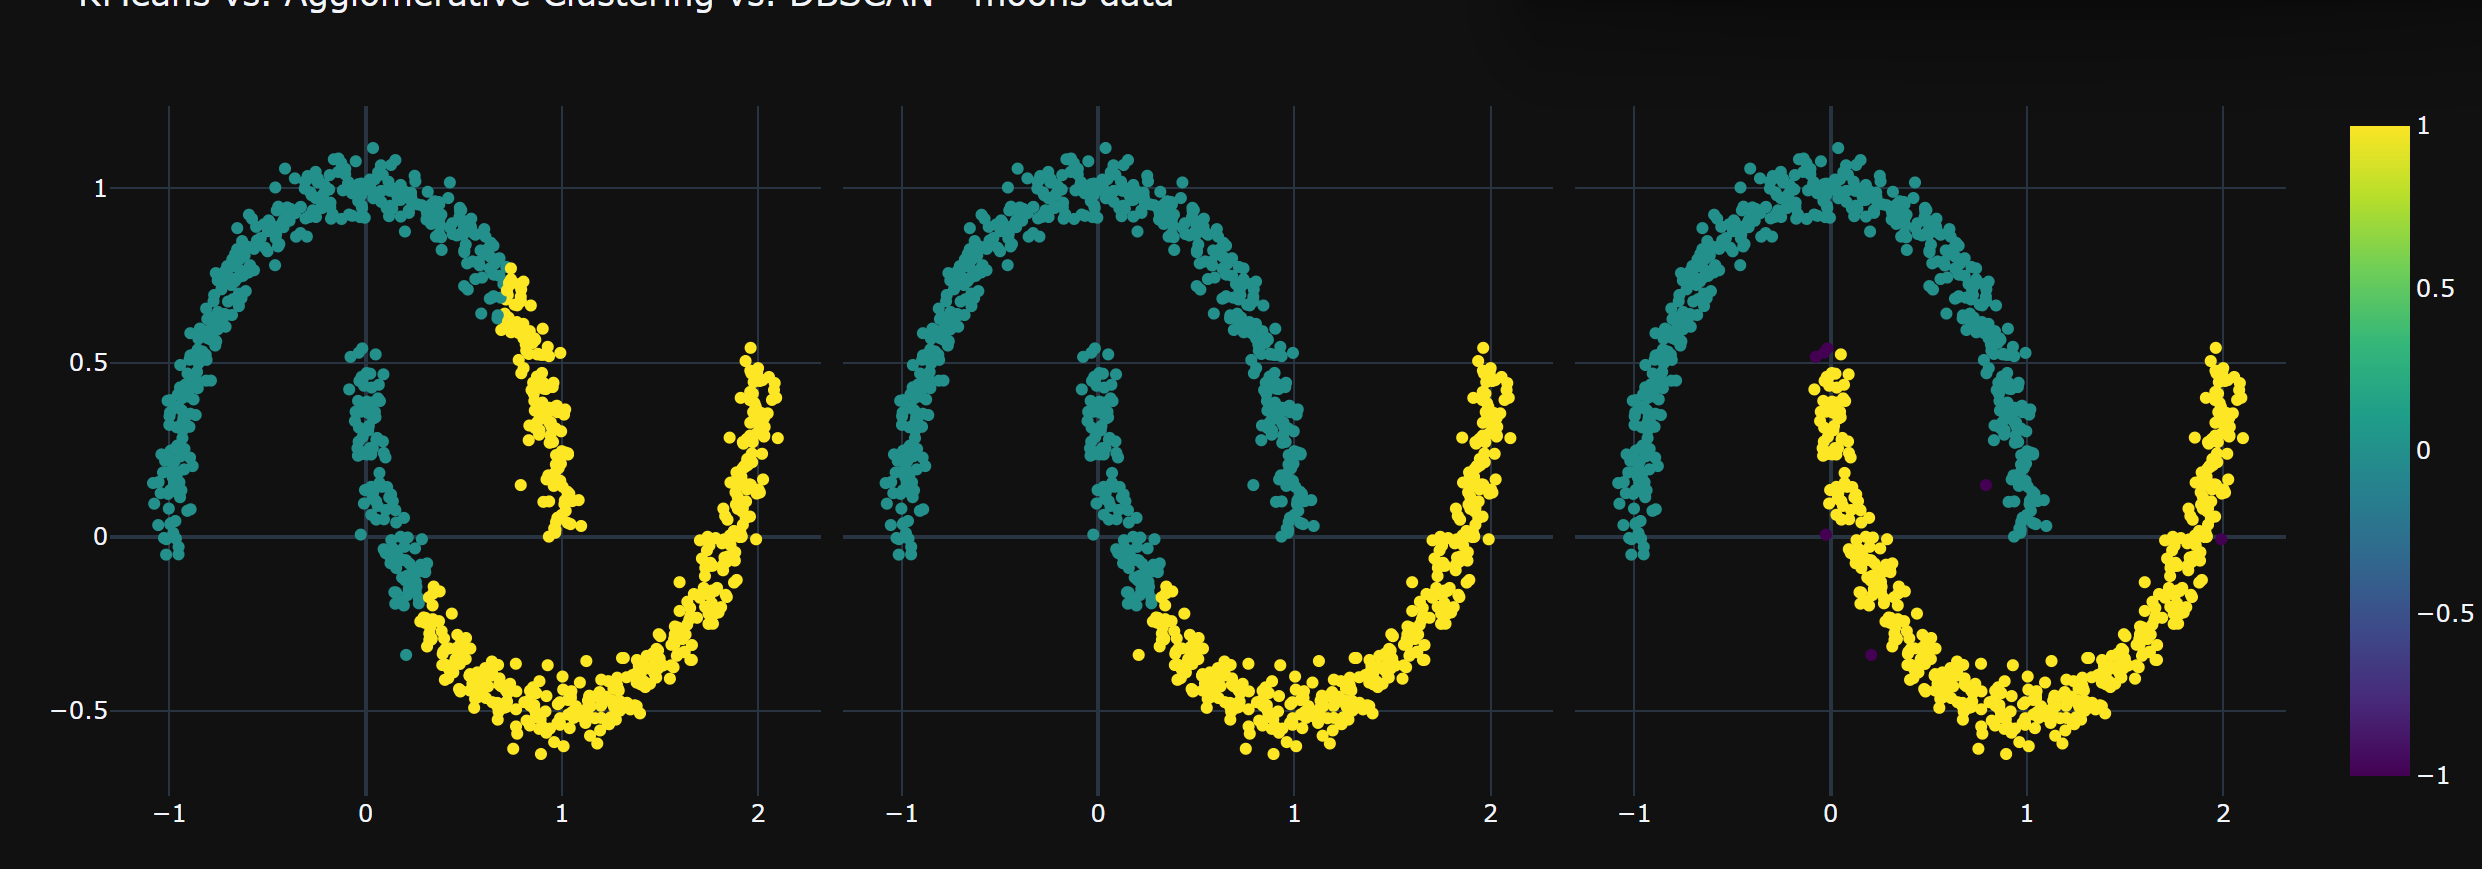

### <a name='4'></a> Porównanie algorytmów - random data

In [10]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

# KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(random_data)
clusters = kmeans.predict(random_data)
random['cluster'] = clusters
trace1 = px.scatter(random, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=5)
clusters = agglo.fit_predict(random_data)
random['cluster'] = clusters
trace2 = px.scatter(random, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

# DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(random_data)
clusters = dbscan.labels_
random['cluster'] = clusters
trace3 = px.scatter(random, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs.DBSCAN - random data', template='plotly_dark',
                  coloraxis = {'colorscale':'viridis'})

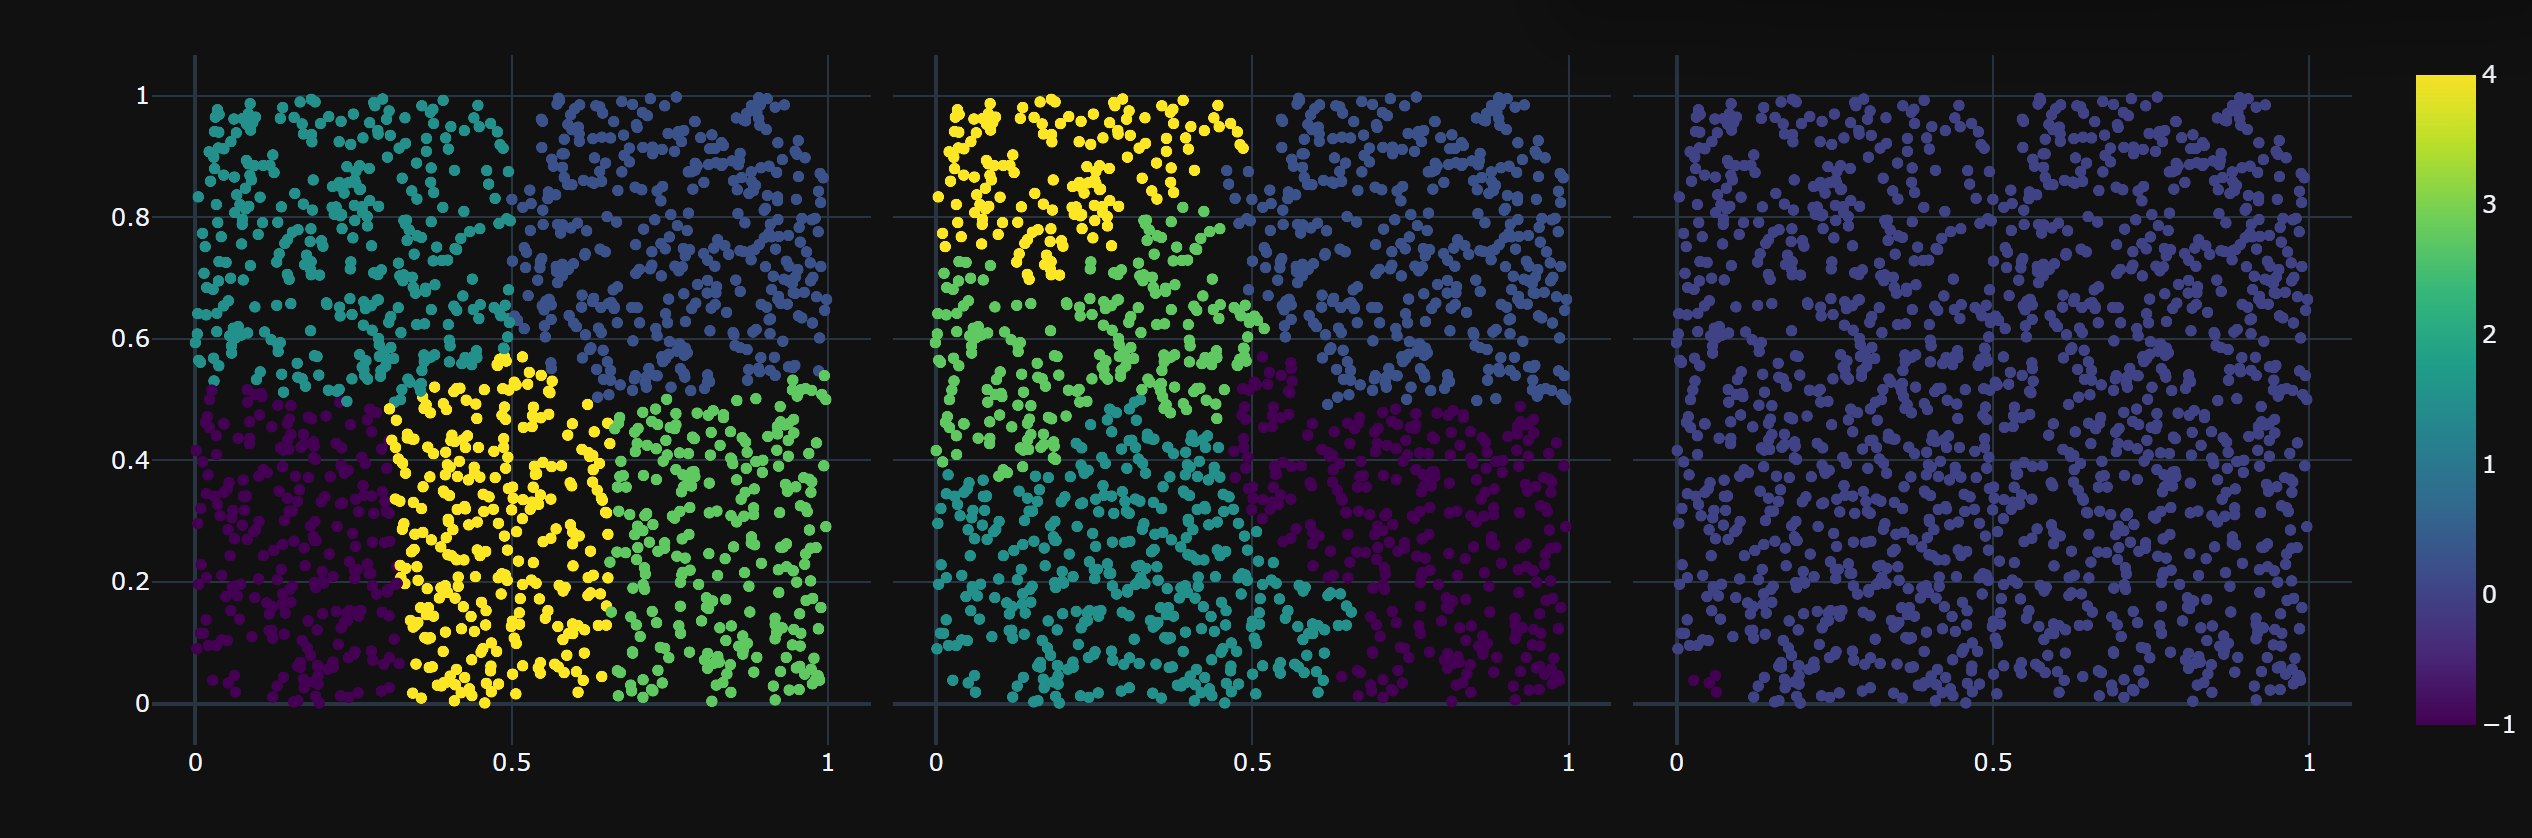